# Binary Classification

In [4]:
"""
Regression Problem
A regression model is a model that is trained with given data and outputs continuous predicted values.
Binary classification can be solved with linear regression. But the performance is not good.
"""
import torch
from torch import nn # Define almost any deep learning library

x = torch.tensor([1.])
model = nn.Linear(1, 1) # make random init weight and bias
print(model.weight)
print(model.bias)

y = model(x) # y = xw + b
print(y)

y = x @ model.weight + model.bias # Simple Linear Regression Model
print(y)

Parameter containing:
tensor([[-0.3144]], requires_grad=True)
Parameter containing:
tensor([0.6191], requires_grad=True)
tensor([0.3046], grad_fn=<AddBackward0>)
tensor([0.3046], grad_fn=<AddBackward0>)


In [5]:
fc1 = nn.Linear(1, 5) # fully connected but Linear Regression Model
fc2 = nn.Linear(5, 1)
print(fc1.weight, fc1.bias)
print(fc2.weight, fc2.bias)

x = torch.tensor([1.])
print(fc1(x))
print(fc2(fc1(x)))

print(x.shape, fc1.weight.shape)
print((x @ fc1.weight.T + fc1.bias) @ fc2.weight.T + fc2.bias)
"""
why using Transpose in nn.Linear ?
becuase In general, the values of a tensor are defined in the order (count, depth, row, column).
and nn.Linear function is taken as an input "column" by linear algebra.
"Column" generally refers to a feature of the data.
Therefore, the weight values are also sorted into "columns" to sort by feature.
"""

# using Sequential
model = nn.Sequential(nn.Linear(2, 5), nn.Linear(5, 1))
x = torch.rand(5,2) # Rows, Columns => pass 5 pieces of data (people) with two column values (age, gender)
print(model(x))

Parameter containing:
tensor([[ 0.8237],
        [-0.6448],
        [-0.0469],
        [-0.2719],
        [ 0.9668]], requires_grad=True) Parameter containing:
tensor([ 0.9579, -0.1956,  0.0331,  0.6271, -0.0488], requires_grad=True)
Parameter containing:
tensor([[-0.1897,  0.2355, -0.2661, -0.2220,  0.1557]], requires_grad=True) Parameter containing:
tensor([-0.2461], requires_grad=True)
tensor([ 1.7816, -0.8404, -0.0138,  0.3552,  0.9180], grad_fn=<AddBackward0>)
tensor([-0.7143], grad_fn=<AddBackward0>)
torch.Size([1]) torch.Size([5, 1])
tensor([-0.7143], grad_fn=<AddBackward0>)
tensor([[ 0.1576],
        [-0.0407],
        [ 0.1817],
        [ 0.1125],
        [ 0.1564]], grad_fn=<AddmmBackward0>)


tensor([[0.2588],
        [0.3549],
        [0.3554],
        [0.3017],
        [0.3222]], grad_fn=<AddmmBackward0>)


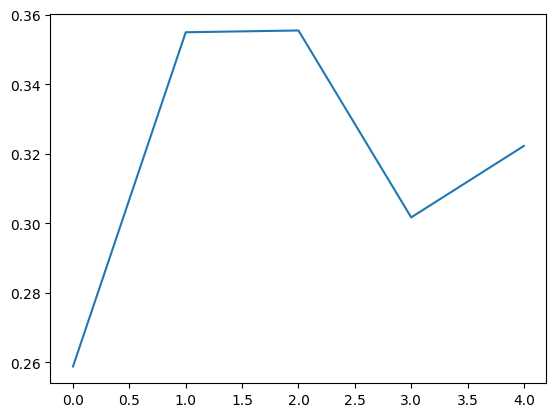

In [6]:
import numpy
# using class
class MLP(nn.Module):
    def __init__(self):
        super().__init__()

        # case 1, simple
        self.linear = nn.Sequential(nn.Linear(2, 100),
                                    nn.Linear(100, 1))
    def forward(self, x):
        x = self.linear(x)
        return x

model = MLP()
x = torch.rand(5,2)
y = model(x)
print(y)

 # show dataset
import matplotlib.pyplot as plt
plt.plot(y.detach().numpy())


torch.Size([20, 2])
torch.Size([20, 1])
MLP(
  (linear): Sequential(
    (0): Linear(in_features=2, out_features=100, bias=True)
    (1): ReLU()
    (2): Sequential(
      (0): Linear(in_features=100, out_features=100, bias=True)
      (1): ReLU()
      (2): Linear(in_features=100, out_features=100, bias=True)
      (3): ReLU()
      (4): Linear(in_features=100, out_features=100, bias=True)
      (5): ReLU()
      (6): Linear(in_features=100, out_features=100, bias=True)
      (7): ReLU()
      (8): Linear(in_features=100, out_features=100, bias=True)
      (9): ReLU()
      (10): Linear(in_features=100, out_features=100, bias=True)
      (11): ReLU()
      (12): Linear(in_features=100, out_features=100, bias=True)
      (13): ReLU()
      (14): Linear(in_features=100, out_features=100, bias=True)
      (15): ReLU()
      (16): Linear(in_features=100, out_features=100, bias=True)
      (17): ReLU()
      (18): Linear(in_features=100, out_features=100, bias=True)
      (19): ReLU()
    

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'colorscale': [[0.0, '#440154'], [0.1111111111111111, '#482878'],
                             [0.2222222222222222, '#3e4989'], [0.3333333333333333,
                             '#31688e'], [0.4444444444444444, '#26828e'],
                             [0.5555555555555556, '#1f9e89'], [0.6666666666666666,
                             '#35b779'], [0.7777777777777778, '#6ece58'],
                             [0.8888888888888888, '#b5de2b'], [1.0, '#fde725']],
              'contours': {'z': {'highlightcolor': 'limegreen',
                                 'project': {'z': True},
                                 'show': True,
                                 'usecolormap': True}},
              'opacity': 0.5,
              'type': 'surface',
              'x': array([[-2.       , -2.       , -2.       , ..., -2.       , -2.       ,
                           -2.       ],
                          [-1.862069 , -1.862069 , -1.862069 , ..., -1.862069 , -1.862069 ,
                           -1.862069 ],
                          [-1.7241379, -1.7241379, -1.7241379, ..., -1.7241379, -1.7241379,
                           -1.7241379],
                          ...,
                          [ 1.7241379,  1.7241379,  1.7241379, ...,  1.7241379,  1.7241379,
                            1.7241379],
                          [ 1.862069 ,  1.862069 ,  1.862069 , ...,  1.862069 ,  1.862069 ,
                            1.862069 ],
                          [ 2.       ,  2.       ,  2.       , ...,  2.       ,  2.       ,
                            2.       ]], dtype=float32),
              'y': array([[-2.       , -1.862069 , -1.7241379, ...,  1.7241379,  1.862069 ,
                            2.       ],
                          [-2.       , -1.862069 , -1.7241379, ...,  1.7241379,  1.862069 ,
                            2.       ],
                          [-2.       , -1.862069 , -1.7241379, ...,  1.7241379,  1.862069 ,
                            2.       ],
                          ...,
                          [-2.       , -1.862069 , -1.7241379, ...,  1.7241379,  1.862069 ,
                            2.       ],
                          [-2.       , -1.862069 , -1.7241379, ...,  1.7241379,  1.862069 ,
                            2.       ],
                          [-2.       , -1.862069 , -1.7241379, ...,  1.7241379,  1.862069 ,
                            2.       ]], dtype=float32),
              'z': array([[5.0945222e-02, 7.4399456e-02, 1.1611268e-01, ..., 9.9984288e-01,
                           9.9989080e-01, 9.9992454e-01],
                          [3.9337449e-02, 5.5557780e-02, 8.2792215e-02, ..., 9.9981409e-01,
                           9.9987161e-01, 9.9991131e-01],
                          [3.1477515e-02, 4.3119140e-02, 6.1647527e-02, ..., 9.9978155e-01,
                           9.9984956e-01, 9.9989629e-01],
                          ...,
                          [1.6385186e-04, 2.0137613e-04, 2.4747365e-04, ..., 2.2275409e-01,
                           4.5666602e-01, 7.1696842e-01],
                          [1.2068761e-04, 1.4828517e-04, 1.8094544e-04, ..., 8.6382784e-02,
                           2.1486826e-01, 4.4843754e-01],
                          [8.8700079e-05, 1.0819050e-04, 1.3197979e-04, ..., 2.9682668e-02,
                           8.2433239e-02, 2.0982581e-01]], dtype=float32)}],
    'layout': {'height': 600, 'template': '...', 'title': {'text': 'binary classification'}, 'width': 700}
})

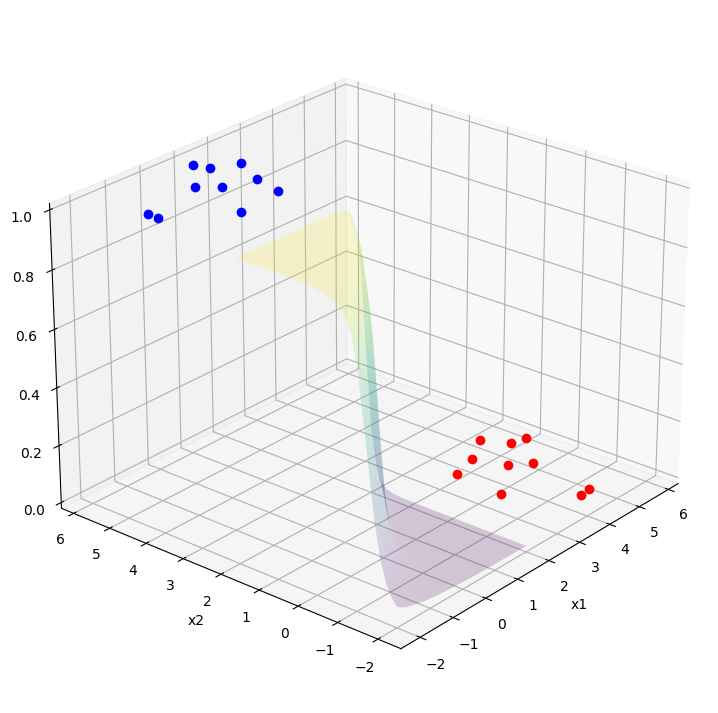

In [8]:
"""
Regression Problem
Binary classification can be solved with logistic regression. Performance is better than linear regression.
"""
import torch

# step 01 : dataset case 1
N = 20
random_1 = torch.randn(int(N/2), 1)   # 10x1
random_2 = torch.randn(int(N/2), 1)+5
cls_1_data = torch.hstack([random_1, random_2]) # 10x2
cls_2_data = torch.hstack([random_2, random_1])
cls_1_label = torch.ones(int(N/2), 1)
cls_2_label = torch.zeros(int(N/2), 1)
x = torch.vstack([cls_1_data, cls_2_data])
y = torch.vstack([cls_1_label, cls_2_label])

print(x.shape)
print(y.shape)

"""
# dataset case 2
N = 100
radius1 = 0.3+0.05*torch.randn(int(N/2),1)
radius2 = 1+0.01*torch.randn(int(N/2),1)
theta1 = 2*torch.pi*torch.rand(int(N/2),1)-torch.pi
theta2 = 2*torch.pi*torch.rand(int(N/2),1)-torch.pi
cls1_data = torch.hstack([radius1*torch.cos(theta1), radius1*torch.sin(theta1)])
cls2_data = torch.hstack([radius2*torch.cos(theta2), radius2*torch.sin(theta2)])
cls1_label = torch.ones(int(N/2),1)
cls2_label = torch.zeros(int(N/2),1)
X=torch.vstack([cls1_data, cls2_data])
y=torch.vstack([cls1_label, cls2_label])
"""
""" # show dataset
import matplotlib.pyplot as plt
#plt.plot(cls_1_data[:,0], cls_1_data[:,1], 'o')
#plt.plot(cls_2_data[:,0], cls_2_data[:,1], 'o')
plt.plot(x[:,0], x[:,1], 'o')
plt.plot(y, 'o')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid()
"""

# step 02 : make model
from torch import nn

class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        """
        self.linear = nn.Sequential(nn.Linear(2, 100),
                                    nn.Sigmoid(),
                                    nn.Linear(100, 1),
                                    nn.Sigmoid())
                
        # case 2, deep
        self.linear = nn.Sequential(nn.Linear(2, 100),
                                    nn.Sigmoid(),
                                    nn.Linear(100, 100),
                                    nn.Sigmoid(),
                                    nn.Linear(100, 100),
                                    nn.Sigmoid(),
                                    nn.Linear(100, 1),
                                    nn.Sigmoid())
        # case 3, very deep
        self.linear = nn.Sequential(nn.Linear(2, 100),
                                    nn.Sigmoid(),
                                    nn.Sequential(*[i for _ in range(10) for i in [nn.Linear(100,100), nn.Sigmoid()]]),
                                    nn.Linear(100, 1),
                                    nn.Sigmoid())
        """
        # case 4, very deep, relu
        self.linear = nn.Sequential(nn.Linear(2, 100),
                                    nn.ReLU(),
                                    nn.Sequential(*[i for _ in range(10) for i in [nn.Linear(100,100), nn.ReLU()]]),
                                    nn.Linear(100, 1),
                                    nn.Sigmoid())
        
    def forward(self, x):
        x = self.linear(x)
        return x

model = MLP()
print(model)

# step 03 : train
from torch import optim
import torch.nn.functional as func

lr = 1e-4 # learning rate
epoch = 500 
optimizer = optim.Adam(model.parameters(), lr=lr)

history_loss = list()

model.train()
for ep in range(epoch):
    y_h = model(x) # forward net
    loss = func.binary_cross_entropy(y_h, y) # loss function
    loss_static = -(torch.sum(torch.log(y_h**y*(1-y_h)**(1-y)))/N)
    optimizer.zero_grad() # Prevent gradient accumulation
    loss.backward() # backward net
    optimizer.step() # weight update
    history_loss += [loss.item()]
    print(f"epoch: {ep}, loss: {round(loss.item(),3)}, loss: {round(loss_static.item(), 3)}")

""" # Prevent gradient accumulation
x= torch.tensor([1.], requires_grad=True)
for _ in range(2):
    loss=x**2
    loss.backward()
    print(x.grad)
    # x.grad = None
"""
""" # show loss
import matplotlib.pyplot as plt
plt.plot(range(0, epoch), history_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
"""

# step 04 : test
x1_test=torch.linspace(-10,10,30) # case 1
x2_test=torch.linspace(-10,10,30) # case 1
x1_test=torch.linspace(-2,2,30) # case 2
x2_test=torch.linspace(-2,2,30) # case 2
X1_test, X2_test=torch.meshgrid(x1_test,x2_test)
X_test=torch.cat([X1_test.unsqueeze(dim=2), X2_test.unsqueeze(dim=2)], dim=2)

model.eval() # test mode
with torch.no_grad():
    y_hat = model(X_test)
# 1. dropout 혹은 BN 같은거 사용했다면 train mode와 test mode 동작이 다르므로 eval()로 mode를 바꿔줘야
# 2. grad_fn 계산 <- 메모리가 불필요하게 쓰인다 
Y_hat = y_hat.squeeze()

import matplotlib.pyplot as plt
plt.figure(figsize=[10, 9])
ax = plt.axes(projection="3d")
ax.view_init(elev=25,azim=-140)
ax.plot_surface(X1_test,X2_test, Y_hat.numpy(), cmap="viridis", alpha=0.2)
plt.plot(cls_1_data[:,0],cls_1_data[:,1],cls_1_label.squeeze(),'bo')
plt.plot(cls_2_data[:,0],cls_2_data[:,1],cls_2_label.squeeze(),'ro')
plt.xlabel("x1")
plt.ylabel("x2")
import plotly.graph_objects as go
fig = go.Figure(data=[go.Surface(x=X1_test, y=X2_test, z=Y_hat, colorscale="viridis", opacity=0.5)])
fig.update_traces(contours_z=dict(show=True, usecolormap=True, highlightcolor="limegreen", project_z=True))
fig.update_layout(title='binary classification', width=700, height=600)

# Real estate problem

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error

df = pd.read_csv('Real_estate.csv')
print(df.shape)
df.drop('No',inplace= True, axis= 1)
x = df.drop('Y house price of unit area', axis= 1)
y = df['Y house price of unit area']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state= 3, shuffle=True)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

model= LinearRegression()
model.fit(X_train, y_train)
print(pd.DataFrame(model.coef_, x.columns, columns=['coeficient']))

y_pred= model.predict(X_test)
print(pd.DataFrame({'Y_test':y_test, 'Y_pred':y_pred}).head())
print("MAE", mean_absolute_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))

(414, 8)
(289, 6) (125, 6) (289,) (125,)
                                        coeficient
X1 transaction date                       5.418815
X2 house age                             -0.269999
X3 distance to the nearest MRT station   -0.004991
X4 number of convenience stores           1.145179
X5 latitude                             207.946345
X6 longitude                            -42.017297
     Y_test     Y_pred
161    39.6  41.400219
130    37.5  44.632017
227    40.2  43.212812
103    45.7  44.031988
240    28.8  33.343182
MAE 6.360993976253947
MSE 70.36291576970008
RMSE 8.388260592619908


# MNIST problem

In [9]:
# MNIST dataset 
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# using GPU if exist
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

transform = transforms.ToTensor()
x_train = datasets.MNIST(root = '.\\MNIST', train=True, download=True, transform=transform)
x_test = datasets.MNIST(root = '.\\MNIST', train=False, download=True, transform=transform)
print(len(x_train), len(x_test))



cuda


 99%|█████████▉| 9830400/9912422 [16:10<00:15, 5171.42it/s] 